<h3>개냥이 분류기</h3>

In [9]:
import os, shutil

original_dataset_dir = 'C:/datasets/cats_and_dogs/train'

base_dir = 'C:/datasets/cats_and_dogs_small'
os.mkdir(base_dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/datasets/cats_and_dogs_small'

In [8]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

NameError: name 'os' is not defined

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [11]:
epoch = 20

In [12]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epoch,
        validation_data=validation_generator,
        validation_steps=50
    )

Epoch 1/20
100/100 [==============================] - 109s 1s/step - loss: 0.6883 - acc: 0.5330 - val_loss: 0.6684 - val_acc: 0.5980
Epoch 2/20
100/100 [==============================] - 114s 1s/step - loss: 0.6552 - acc: 0.6140 - val_loss: 0.7529 - val_acc: 0.5090
Epoch 3/20
100/100 [==============================] - 115s 1s/step - loss: 0.6190 - acc: 0.6665 - val_loss: 0.6043 - val_acc: 0.6680
Epoch 4/20
100/100 [==============================] - 115s 1s/step - loss: 0.5765 - acc: 0.6960 - val_loss: 0.6591 - val_acc: 0.6280
Epoch 5/20
100/100 [==============================] - 115s 1s/step - loss: 0.5486 - acc: 0.7230 - val_loss: 0.6520 - val_acc: 0.6420
Epoch 6/20
100/100 [==============================] - 114s 1s/step - loss: 0.5172 - acc: 0.7375 - val_loss: 0.6782 - val_acc: 0.6160
Epoch 7/20
100/100 [==============================] - 114s 1s/step - loss: 0.5014 - acc: 0.7585 - val_loss: 0.5672 - val_acc: 0.6920
Epoch 8/20
100/100 [==============================] - 113s 1s/step - 

In [13]:
model.save('cats_and_dogs_small_1.h5')

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<h2>이미지 증폭</h2>

In [15]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

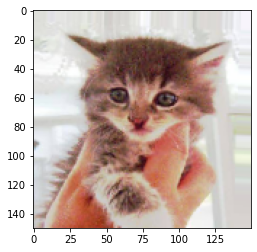

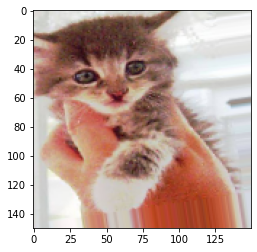

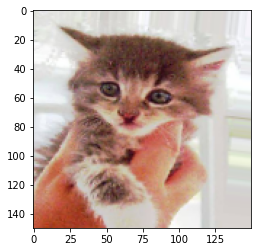

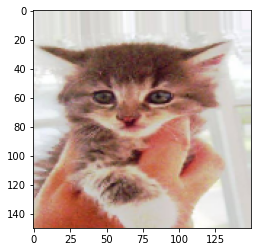

In [16]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    implot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 ==0:
        break

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [18]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(
        rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epoch,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 184s 2s/step - loss: 0.6912 - acc: 0.5213 - val_loss: 0.6735 - val_acc: 0.5812
Epoch 2/20
100/100 [==============================] - 184s 2s/step - loss: 0.6776 - acc: 0.5609 - val_loss: 0.7189 - val_acc: 0.5102
Epoch 3/20
100/100 [==============================] - 181s 2s/step - loss: 0.6665 - acc: 0.5769 - val_loss: 0.6389 - val_acc: 0.6237
Epoch 4/20
100/100 [==============================] - 180s 2s/step - loss: 0.6525 - acc: 0.6109 - val_loss: 0.6292 - val_acc: 0.6250
Epoch 5/20
100/100 [==============================] - 180s 2s/step - loss: 0.6387 - acc: 0.6256 - val_loss: 0.6194 - val_acc: 0.6402
Epoch 6/20
100/100 [==============================] - 184s 2s/step - loss: 0.6149 - acc: 0.6594 - val_loss: 0.5842 - val_acc: 0.6897
Epoch 7/20
100/100 [==============================] - 181s 2s/step - loss: 0.6042 - acc: 0.6638 - val_loss: 0.5951 - v

In [19]:
model.save('cats_and_dogs_small_2.h5')

<h2>VGG16 Model 사용</h2>

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [21]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

데이터 증식을 사용하지 않는 빠른 특성 추출

In [22]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [23]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [24]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
    )
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        
        i += 1
        
        if i * batch_size >= sample_count:
            break
    
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [26]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [27]:
history = model.fit(
    train_features, train_labels,
    epochs=epoch,
    batch_size=20,
    validation_data=(validation_features, validation_labels)    
)

Train on 2000 samples, validate on 1000 samples
Epoch 1/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.4580 - acc: 0.7780 - val_loss: 0.2980 - val_acc: 0.8800
Epoch 2/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2903 - acc: 0.8740 - val_loss: 0.2625 - val_acc: 0.8980
Epoch 3/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2432 - acc: 0.9035 - val_loss: 0.2385 - val_acc: 0.9040
Epoch 4/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2063 - acc: 0.9170 - val_loss: 0.2458 - val_acc: 0.9000
Epoch 5/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1793 - acc: 0.9330 - val_loss: 0.2368 - val_acc: 0.9010
Epoch 6/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1535 - acc: 0.9405 - val_loss: 0.2417 - val_acc: 0.9020
Epoch 7/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1365 - acc: 0.9495 - val_loss: 0.2515 - val_acc: 0.9020
Epoch 8/20
200

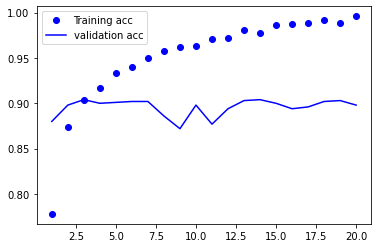

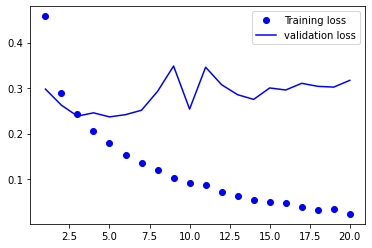

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.legend()

plt.show()

데이터 증식을 사용

In [3]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
conv_base.trainable = False

In [6]:
print(len(model.trainable_weights))

4


In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(
        rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

NameError: name 'train_dir' is not defined

In [ ]:
# history = model.fit_generator(
#        train_generator,
#        steps_per_epoch=100,
#        epochs=1,
#        validation_data=validation_generator,
#        validation_steps=50)

미세 조정

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=50)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.legend()

plt.show()